<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ajuarezjc/blob/main/RegresionLinearPolinomial_A01168444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

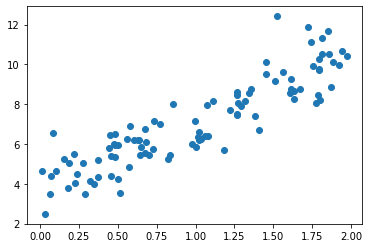

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

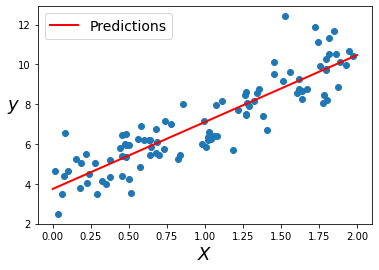

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

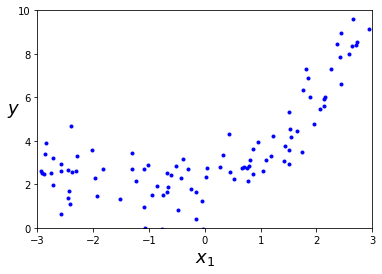

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

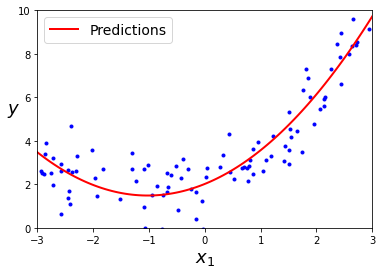

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

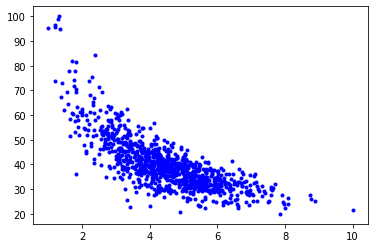

In [28]:
plt.plot(X,y,'b.')

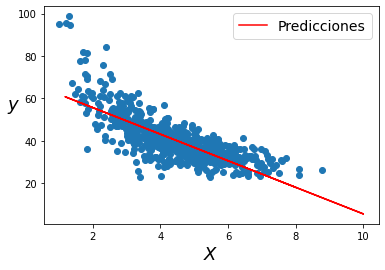

In [29]:
#lineal
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
mae_list = []
r2_list = []

# Linear Regression

lr = LinearRegression(fit_intercept = True)
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)


plt.scatter(x_train, y_train)
plt.plot(x_test, y_hat, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)


In [30]:
# Equation
print("Equation: Y = {}X + {}".format(lr.coef_, lr.intercept_))

Equation: Y = [-6.27560244]X + 68.18360938804265


In [31]:
# Errors
from sklearn import metrics
from sklearn.metrics import r2_score
mae_lr = metrics.mean_absolute_error(y_test, y_hat)
mae_list.append(mae_lr)
r2_lr = r2_score(y_test, y_hat)
r2_list.append(r2_lr)

print("Errors from LinearRegression")
print("MAE LR:", mae_lr)
print("R2 LR:", r2_lr)

Errors from LinearRegression
MAE LR: 4.966167211490924
R2 LR: 0.5666859743286023


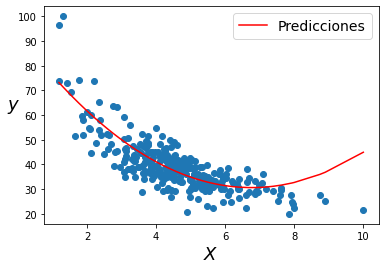

In [32]:
#polinomial

# Getting Pol Features
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2, include_bias=False)
x_train_poly = poly_feat.fit_transform(x_train)
x_test_poly = poly_feat.fit_transform(x_test)

# Running LR with PolyFeatures
lr_poly = LinearRegression(fit_intercept = True)
lr_poly.fit(x_train_poly, y_train)

y_poly_hat = lr_poly.predict(x_test_poly)

# Graph
order = np.argsort(x_test.values.ravel())
sorted_x_poly = x_test.values.ravel()[order]
sorted_y_poly = y_test.values.ravel()[order]
sorted_y_hat_poly = y_poly_hat[order]

plt.scatter(x_test, y_test)
plt.plot(sorted_x_poly, sorted_y_hat_poly, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [33]:
# Equation for LR Polynomial

print("Equation:")
print('Y = {}*X^2 + {}*X + {}'.format(lr_poly.coef_[1], lr_poly.coef_[0],lr_poly.intercept_))


Equation:
Y = 1.3665181844597762*X^2 + -18.48725956628395*X + 93.17557762076862


In [34]:
# Errors for Poly LR

mae_lr_p = metrics.mean_absolute_error(y_test, y_poly_hat)
mae_list.append(mae_lr_p)
r2_lr_p = r2_score(y_test, y_poly_hat)
r2_list.append(r2_lr_p)

print("Errors from PolyLinearRegression")
print("MAE LRPoly:", mae_lr_p)
print("R2 LRPoly:", r2_lr_p)

Errors from PolyLinearRegression
MAE LRPoly: 4.621536782078726
R2 LRPoly: 0.6496536298133441


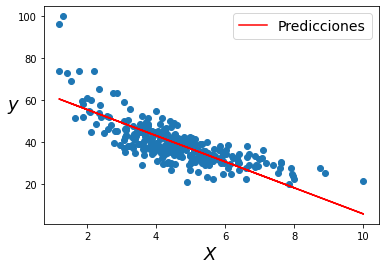

In [35]:
# RidgeRegression
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 10, fit_intercept = True)
rr.fit(x_train, y_train)
x_ridge = x_test
y_hat_ridge = rr.predict(x_ridge)

plt.scatter(x_test, y_test)
plt.plot(x_ridge, y_hat_ridge, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [36]:
# Errors for Ridge

mae_lr_rr = metrics.mean_absolute_error(y_test, y_hat_ridge)
mae_list.append(mae_lr_rr)
r2_lr_rr = r2_score(y_test, y_hat_ridge)
r2_list.append(r2_lr_rr)

print("Errors from RidgeRegression")
print("MAE RR:", mae_lr_rr)
print("R2 RR:", r2_lr_rr)

Errors from RidgeRegression
MAE RR: 4.950935230762346
R2 RR: 0.5680419479285249


In [37]:
# Equation for Ridge

print("Equation")
print("Y = {}*X + {}".format(rr.coef_,rr.intercept_))

Equation
Y = [-6.22247438]*X + 67.94889697269001


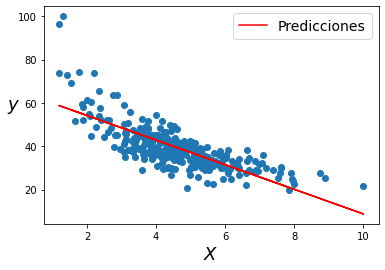

In [38]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1, fit_intercept = True)
lasso.fit(x_train, y_train)
x_lasso = x_test
y_hat_lasso = lasso.predict(x_lasso)

plt.scatter(x_test, y_test)
plt.plot(x_lasso, y_hat_lasso, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [39]:
# Errors for Lasso

mae_lr_l = metrics.mean_absolute_error(y_test, y_hat_lasso)
mae_list.append(mae_lr_l)
r2_lr_l = r2_score(y_test, y_hat_lasso)
r2_list.append(r2_lr_l)

print("Errors from Lasso")
print("MAE Lasso:", mae_lr_l)
print("R2 Lasso:", r2_lr_l)

Errors from Lasso
MAE Lasso: 4.8333265449702365
R2 Lasso: 0.5757406033865122


In [40]:
# Equation 

print("Lasso Equation")
print("Y = {}*X + {}".format(lasso.coef_,lasso.intercept_))

Lasso Equation
Y = [-5.67793595]*X + 65.5432017178372


['LR', 'PolyLR', 'Ridge', 'Lasso']
[4.966167211490924, 4.621536782078726, 4.950935230762346, 4.8333265449702365]


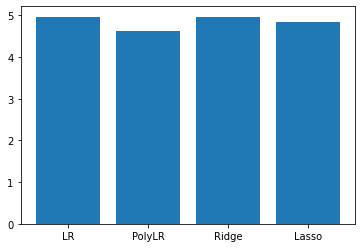

In [41]:
# Graphs for MAE Errors

names = ["LR","PolyLR","Ridge","Lasso"]
print(names)
print(mae_list)
plt.bar(names,mae_list)
plt.show()

['LR', 'PolyLR', 'Ridge', 'Lasso']
[0.5666859743286023, 0.6496536298133441, 0.5680419479285249, 0.5757406033865122]


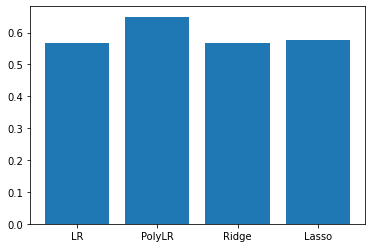

In [42]:
# Graphs for R2 Errors
print(names)
print(r2_list)
plt.bar(names,r2_list)
plt.show()

### Conclusiones Ejercicio 1

* Se usa una particion 70/30 para el entrenamiento y prueba de datos
* Se encuentra que el método de PolynomialLinearRegression es el mejor método para realizar las predicciones
* Su R2 está por encima de los demás métodos
* El MAE está un punto por debajo de los demás métodos, mostrando que sigue mejor los datos, y según las gráficas del modelo, se puede encontrar un mejor seguimiento cuando los datos se encuentran en las variaciones medias, donde los demás métodos tienen mayores errores

In [43]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

NameError: ignored

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


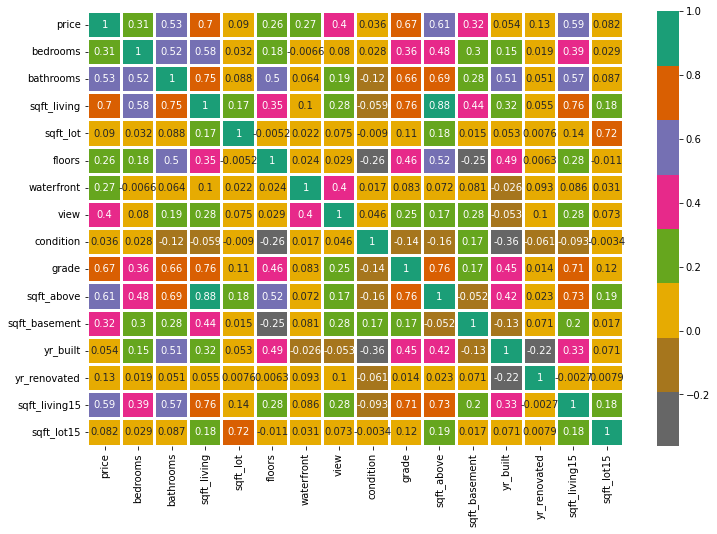

In [48]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [49]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [98]:
#tu codigo aquí

mae_mul_list = []
r2_mul_list = []

# Code for LR

mrl = LinearRegression(fit_intercept=True)
mrl.fit(X_train, y_train)

y_hat_mrl = mrl.predict(X_test)

mae_mrl = metrics.mean_absolute_error(y_test, y_hat_mrl)
r2_mrl = metrics.r2_score(y_test, y_hat_mrl)

print("Errors for MultipleLinearRegression")
print("MAE for MultipleLinearRegression", mae_mrl)
print("R2 for MultipleLinearRegression", r2_mrl)

mae_mul_list.append(mae_mrl)
r2_mul_list.append(r2_mrl)

print("Equation for MultipleLinearRegression")
mrl_coefs = mrl.coef_
mrl_inter = mrl.intercept_

eq_mrl = ""
for (i, coef) in enumerate(mrl_coefs[0]):
  eq_mrl += "{}*X{} + ".format(np.round(coef,2),i+1)
eq_mrl += "{}".format(np.round(mrl_inter[0],2))
print(eq_mrl)


Errors for MultipleLinearRegression
MAE for MultipleLinearRegression 137480.1388273178
R2 for MultipleLinearRegression 0.6579723205007814
Equation for MultipleLinearRegression
-38200.8*X1 + 41466.14*X2 + 107.99*X3 + 0.02*X4 + 31691.69*X5 + 552691.02*X6 + 41249.32*X7 + 21222.14*X8 + 119493.22*X9 + 47.78*X10 + 60.22*X11 + -3550.9*X12 + 13.26*X13 + 29.01*X14 + -0.55*X15 + 6151359.26


In [99]:
# Code for Poly Multiple Linear Regression

multi_poly_features = PolynomialFeatures(degree=2, include_bias=False)

multi_x_poly = multi_poly_features.fit_transform(X_train)

mrl_poly = LinearRegression(fit_intercept=True)
mrl_poly.fit(multi_x_poly, y_train)

x_test_poly = multi_poly_features.fit_transform(X_test)
y_hat_poly = mrl_poly.predict(x_test_poly)

mae_mrl_poly = metrics.mean_absolute_error(y_test, y_hat_poly)
r2_mrl_poly = metrics.r2_score(y_test, y_hat_poly)

print("Errors for Poly MultipleLinearRegression")
print("MAE for MultipleLinearRegression", mae_mrl_poly)
print("R2 for MultipleLinearRegression", r2_mrl_poly)

mae_mul_list.append(mae_mrl_poly)
r2_mul_list.append(r2_mrl_poly)

print("Equation for Poly MultipleLinearRegression")
mrl_poly_coefs = mrl_poly.coef_
mrl_poly_inter = mrl_poly.intercept_

eq_mrl_poly = ""
for (i, coef) in enumerate(mrl_poly_coefs[0]):
  eq_mrl_poly += "{}*X{} + ".format(np.round(coef,2),i+1)
eq_mrl_poly += "{}".format(np.round(mrl_poly_inter[0],2))
print(eq_mrl_poly)

Errors for Poly MultipleLinearRegression
MAE for MultipleLinearRegression 121314.06948173394
R2 for MultipleLinearRegression 0.7797929072570198
Equation for Poly MultipleLinearRegression
933912.83*X1 + -1093307.3*X2 + -456.45*X3 + -27.87*X4 + -2074072.38*X5 + -3954318.7*X6 + -288638.03*X7 + 558697.57*X8 + 1098645.1*X9 + -219.76*X10 + -382.03*X11 + -85963.09*X12 + -2953.52*X13 + 3999.66*X14 + -34.01*X15 + 957.54*X16 + 7499.58*X17 + -13.8*X18 + -0.02*X19 + 8577.0*X20 + -11496.59*X21 + -306.59*X22 + -5246.29*X23 + -5367.88*X24 + -1.21*X25 + -14.61*X26 + -467.1*X27 + -9.13*X28 + 17.28*X29 + 0.22*X30 + -9634.3*X31 + 15.39*X32 + -0.14*X33 + -25906.73*X34 + 43370.72*X35 + 3829.42*X36 + -1075.93*X37 + 22297.17*X38 + 14.43*X39 + 1.34*X40 + 503.4*X41 + -17.08*X42 + -17.29*X43 + -0.06*X44 + 1.56*X45 + -4.35*X46 + 4.83*X47 + 160.3*X48 + -14.27*X49 + 13.11*X50 + 20.73*X51 + 2.61*X52 + -4.41*X53 + -2.21*X54 + 0.06*X55 + 3.54*X56 + 18.82*X57 + 0.0*X58 + 0.44*X59 + -0.1*X60 + -0.1*X61 + 0.09*X62 + 0.1

In [100]:
# Code for Ridge
mrr = Ridge(alpha=5, fit_intercept=True)
mrr.fit(X_train, y_train)

y_hat_mrr = mrr.predict(X_test)

mae_mrr = metrics.mean_absolute_error(y_test, y_hat_mrr)
r2_mrr = metrics.r2_score(y_test, y_hat_mrr)

print("Errors for RidgeRegression")
print("MAE for RidgeRegression", mae_mrr)
print("R2 for RidgeRegression", r2_mrr)

mae_mul_list.append(mae_mrr)
r2_mul_list.append(r2_mrr)

print("Equation for RidgeRegression")
mrr_coefs = mrr.coef_
mrr_inter = mrr.intercept_

eq_mrr = ""
for (i, coef) in enumerate(mrr_coefs[0]):
  eq_mrr += "{}*X{} + ".format(np.round(coef,2),i+1)
eq_mrr += "{}".format(np.round(mrr_inter[0],2))
print(eq_mrr)



Errors for RidgeRegression
MAE for RidgeRegression 137533.65574257114
R2 for RidgeRegression 0.6575050300500245
Equation for RidgeRegression
-38289.62*X1 + 41391.43*X2 + 108.1*X3 + 0.02*X4 + 31678.81*X5 + 531220.19*X6 + 42249.24*X7 + 21242.42*X8 + 119381.76*X9 + 47.93*X10 + 60.17*X11 + -3548.94*X12 + 13.54*X13 + 28.91*X14 + -0.55*X15 + 6148385.38


In [101]:
# Code for Lasso

mlasso = Lasso(alpha=1, fit_intercept=True)
mlasso.fit(X_train, y_train)

y_hat_mlasso = mlasso.predict(X_test)

mae_mlasso = metrics.mean_absolute_error(y_test, y_hat_mlasso)
r2_mlasso = metrics.r2_score(y_test, y_hat_mlasso)

print("Errors for Lasso")
print("MAE for Lasso", mae_mlasso)
print("R2 for Lasso", r2_mlasso)

mae_mul_list.append(mae_mlasso)
r2_mul_list.append(r2_mlasso)

print("Equation for Lasso")
mlasso_coefs = mlasso.coef_
mlasso_inter = mlasso.intercept_
eq_mlasso = ""
for (i, coef) in enumerate(mlasso_coefs):
  eq_mlasso += "{}*X{} + ".format(np.round(coef,2),i+1)
eq_mlasso += "{}".format(np.round(mlasso_inter[0],2))
print(eq_mlasso)

Errors for Lasso
MAE for Lasso 137480.57154885164
R2 for Lasso 0.6579689024340813
Equation for Lasso
-38199.53*X1 + 41461.86*X2 + 293.48*X3 + 0.02*X4 + 31687.14*X5 + 552541.11*X6 + 41254.97*X7 + 21219.39*X8 + 119491.84*X9 + -137.71*X10 + -125.27*X11 + -3550.85*X12 + 13.26*X13 + 29.01*X14 + -0.55*X15 + 6151280.11


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


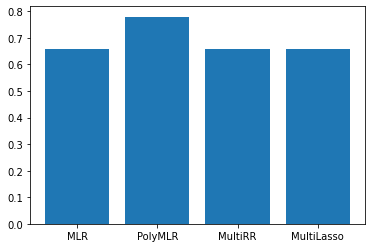

In [102]:
# Code for R2 Graphs

names = ["MLR","PolyMLR","MultiRR","MultiLasso"]
plt.bar(names,r2_mul_list)
plt.show()

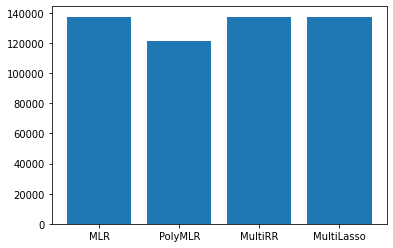

In [103]:
# Code for MAE Graphs

names = ["MLR","PolyMLR","MultiRR","MultiLasso"]
plt.bar(names,mae_mul_list)
plt.show()

### Conclusiones Ejercicio 2

* De igual forma, se encuentra un mejor funcionamiento cuando se usa una función polinomial de grado 2
* El valor de R2 se incrementa .2 puntos por arriba de cualquier otro método que solo usa factores lineales
* El error presentado se decrementa significativamente cuando se usa un modelo con función polinomial de grado 2